<style>* {font-family: "SaxMono", "Consolas", monospace}</style>

# KDD Cup 2009

Author: Felipe Camargo de Pauli  
Date: 10/23

<img src="KDD_CUP.png" width="300px" alt="KDD Cup Image">

<style>* {font-family: "SaxMono", "Consolas", monospace}</style>

# 1. Problem Definition and Strategy  
- 1.1 Clearly define the problem and objective.  
- 1.2 Understand what the data represents and its characteristics.
- 1.3 Propose an initial solution.

### 1.1 Clearly define the problem and objective.  
Customer Relationship Management (CRM) is a key element of modern marketing strategies. The KDD Cup 2009 offers the opportunity to work on large marketing databases from the French Telecom company Orange to predict the propensity of customers to switch provider (churn), buy new products or services (appetency), or buy upgrades or add-ons proposed to them to make the sale more profitable (up-selling).

### 1.2 Understand what the data represents and its characteristics.
The most practical way, in a CRM system, to build knowledge on customer is to produce scores. A score (the output of a model) is an evaluation for all instances of a target variable to explain (i.e. churn, appetency or up-selling). Tools which produce scores allow to project, on a given population, quantifiable information. The score is computed using input variables which describe instances. Scores are then used by the information system (IS), for example, to personalize the customer relationship. An industrial customer analysis platform able to build prediction models with a very large number of input variables has been developed by Orange Labs. This platform implements several processing methods for instances and variables selection, prediction and indexation based on an efficient model combined with variable selection regularization and model averaging method. The main characteristic of this platform is its ability to scale on very large datasets with hundreds of thousands of instances and thousands of variables. The rapid and robust detection of the variables that have most contributed to the output prediction can be a key factor in a marketing application.

The challenge is to beat the in-house system developed by Orange Labs. It is an opportunity to prove that you can deal with a very large database, including heterogeneous noisy data (numerical and categorical variables), and unbalanced class distributions. Time efficiency is often a crucial point. Therefore part of the competition will be time-constrained to test the ability of the participants to deliver solutions quickly.

https://www.kdd.org/kdd-cup/view/kdd-cup-2009


### 1.3 Propose an initial solution.
Execute the Data Science's Workflow and create a final report with the results.
#### Deliveries
- Notebook with data analysis
- Report with results

## 2. Gather the Data
### 2.1 Seek out the data (datasets)
The data is available on comptetition's [link](https://www.kdd.org/kdd-cup/view/kdd-cup-2009). We will use the orange_small preset data.

### 2.2 Take a first look at the data
- It has 230 features
- From 1 to 190 we have numerical features; From 190 to 230 we have categorical features
- There are a huge mess, but structured mess
- The columns are separated by tabs

### 2.3 Prepare them for import into notebooks
There is no need. The data is ready for Data Analysis.


## 3. Data Loading, Initial Visualization, and Transformation
### 3.1 Load the data and visualize the first few rows.

In [52]:
# Basic imports
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [53]:
train_data  = pd.read_csv('./data/orange_small_train.data', sep = '\t', na_filter=False)
target      = pd.read_csv('./data/orange_small_train_churn.labels', header=None) 

In [54]:
df = train_data.copy()

In [55]:
print(df.shape)
print(target.shape)

(50000, 230)
(50000, 1)


As we can see, there are 5 thousand samples and 230 features plus 1 target.

In [56]:
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,,,,,,1526,7,,,,...,oslk,fXVEsaq,jySVZNlOJy,,,xb3V,RAYp,F2FyR07IdsN7I,,
1,,,,,,525,0,,,,...,oslk,2Kb5FSF,LM8l689qOp,,,fKCe,RAYp,F2FyR07IdsN7I,,
2,,,,,,5236,7,,,,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,
3,,,,,,,0,,,,...,oslk,CE7uk3u,LM8l689qOp,,,FSa2,RAYp,F2FyR07IdsN7I,,
4,,,,,,1029,7,,,,...,oslk,1J2cvxe,LM8l689qOp,,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,


In [57]:
df.iloc[:, 180:200].dropna(subset=["Var190"])

,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200
0,0,,,,,,,,462,,,bZkvyxLkBI,RO12,,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,
1,0,,,,,,,,,,,CEat0G8rTN,RO12,,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,
2,0,,,,,,,,,,,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9
3,0,,,,,,,,,,,jg69tYsGvO,RO12,,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,
4,0,,,,,,,,,,,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,,,,,,,,,,,xOXr4RXktW,RO12,,taul,1K8T,ZNsX,7nPy3El,h3WsUQk,
49996,0,,,,,,,,396,,,S8dr4RQxul,2Knk1KF,SEuy,I9xt3GBDKUbd8,1K8T,JLbT,kJ1JA2C,7aPrx0x,tkF1jmy
49997,0,,,,,,,,,,,uUdt0G8EIb,2Knk1KF,,taul,1K8T,0Xwj,LK5nVRA,k10MzgT,_VHQRHe
49998,,0,,,,,,,276,,r__I,FoxgUHSK8h,RO12,,taul,1K8T,AHgj,VcW4jEC,LH0kFz12FM,


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(2), int64(1), object(227)
memory usage: 87.7+ MB


In [59]:
np.unique(target)

array([-1,  1])

All seems to be as expected. We have only two targets, -1 will not something, +1 will do something.In this case we're going to analyse if the clients will churn or not by the features analyse.

### 3.2 Perform individual transformations.

We are going to:  
1. Create an all_vars np.array
2. Create a num_vars np.array with the 190 first columns
3. Create a cat_vars np.array with the other columns
4. Create a dataframe with all columns counts

In [60]:
df.dtypes

Var1      object
Var2      object
Var3      object
Var4      object
Var5      object
           ...  
Var226    object
Var227    object
Var228    object
Var229    object
Var230    object
Length: 230, dtype: object

In [61]:
all_vars = np.array(df.columns)

In [62]:
num_vars = np.array(all_vars[0:190])
cat_vars = np.array(all_vars[190:])

In [63]:
np.unique(df["Var1"])

array(['', '0', '120', '128', '152', '16', '24', '32', '360', '392', '40',
       '48', '536', '56', '64', '680', '72', '8', '80'], dtype=object)

In [64]:
var = df.groupby("Var1").size()

In [65]:
var

Var1
       49298
0        380
120        1
128        2
152        1
16        81
24        46
32        23
360        1
392        1
40        10
48         6
536        1
56         5
64         1
680        1
72         3
8        138
80         1
dtype: int64

In [66]:
counts_per_column = pd.DataFrame()
for column in num_vars:
    col_count = df.groupby(column).size()
    counts_per_column[column] = col_count

/tmp/ipykernel_659202/3693400232.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  counts_per_column[column] = col_count
/tmp/ipykernel_659202/3693400232.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  counts_per_column[column] = col_count
/tmp/ipykernel_659202/3693400232.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [68]:
counts_per_column.shape

(19, 190)

In [67]:
counts_per_column

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190
Var1,,,,,,,,,,,,,,,,,,,,,
,49298,48759.0,48760.0,48421.0,48513.0,5529.0,5539.0,50000.0,49298.0,48513.0,...,5009.0,48421.0,48759.0,48759.0,50000.0,49298.0,49298.0,48759.0,28978.0,49667.0
0,380,1240.0,996.0,1561.0,898.0,976.0,13090.0,NaN,144.0,902.0,...,41990.0,706.0,830.0,771.0,NaN,525.0,240.0,44.0,NaN,4.0
120,1,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN
128,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,...,NaN,NaN,NaN,48.0,NaN,NaN,15.0,NaN,NaN,NaN
24,46,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,17.0,NaN,8.0,12.0,NaN,2.0,NaN
32,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,...,NaN,NaN,NaN,17.0,NaN,NaN,3.0,NaN,NaN,NaN
360,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,354.0,NaN


In [71]:
counts_per_column = counts_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace = True)
print('Primeiras dez categorias: ', counts_per_column.index[:10])
print('Últimas dez categorias: ', counts_per_column.index[(len(counts_per_column.index)-10):])

Primeiras dez categorias:  Index(['Var1', 'Var10', 'Var100', 'Var101', 'Var102', 'Var103', 'Var104',
       'Var105', 'Var106', 'Var107'],
      dtype='object')
Últimas dez categorias:  Index(['Var90', 'Var91', 'Var92', 'Var93', 'Var94', 'Var95', 'Var96', 'Var97',
       'Var98', 'Var99'],
      dtype='object')


In [73]:
counts_per_column = pd.DataFrame()
for col in cat_vars:
  col_count = df.groupby(col).size()
  counts_per_column = counts_per_column.append(col_count, ignore_index = True)

/tmp/ipykernel_659202/2723866050.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_per_column = counts_per_column.append(col_count, ignore_index = True)
/tmp/ipykernel_659202/2723866050.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_per_column = counts_per_column.append(col_count, ignore_index = True)
/tmp/ipykernel_659202/2723866050.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_per_column = counts_per_column.append(col_count, ignore_index = True)
/tmp/ipykernel_659202/2723866050.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_per_column = counts_per_column.append(col_count, ignore_index = Tr

In [74]:
counts_per_column = counts_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace = True)
print('Primeiras dez categorias: ', counts_per_column.index[:10])
print('Últimas dez categorias: ', counts_per_column.index[(len(counts_per_column.index)-10):])

Primeiras dez categorias:  Index(['', '000J', '0062', '00AD', '00ARusu', '00AYONy', '00AhP4J', '00J8E9a',
       '00JHTSP', '00L3'],
      dtype='object')
Últimas dez categorias:  Index(['zzQ9udm', 'zzQV', 'zzbGOGx', 'zzbGa54', 'zzcv6yg4s3UGv', 'zzfHvGh',
       'zzfLM_S', 'zzfUfAI', 'zzfo6HG', 'zzpZ'],
      dtype='object')


In [76]:
df = df.replace('', np.nan)

In [77]:
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526,7,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525,0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236,7,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029,7,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [79]:
for col in num_vars:
  df[col] = df[col].astype('float')
for col in cat_vars:
  df[col] = df[col].astype('category')

In [81]:
df.dtypes

Var1       float64
Var2       float64
Var3       float64
Var4       float64
Var5       float64
            ...   
Var226    category
Var227    category
Var228    category
Var229    category
Var230    category
Length: 230, dtype: object

Features from 1 to 190 - numbers  
Features from 190 to 230 - categorical

In [11]:
df.iloc[:, 0:190] = df.iloc[:, 0:190].apply(pd.to_numeric, errors='coerce')


/tmp/ipykernel_615836/1355131187.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0:190] = df.iloc[:, 0:190].apply(pd.to_numeric, errors='coerce')


In [12]:
df.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,44991.000000,1.579000e+03,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,0.611456,1.416638e+06,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.495681,2.279786e+06,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000,1.167780e+05,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,0.000000,1.844952e+06,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,49.000000,1.199478e+07,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000


We can see that only the numeric columns were shown as result of describe method.

In [13]:
print(df.dtypes)

Var1      float64
Var2      float64
Var3      float64
Var4      float64
Var5      float64
           ...   
Var226     object
Var227     object
Var228     object
Var229     object
Var230     object
Length: 230, dtype: object


In [14]:
# Helpers
def analyse_frequencies(df, columns):
    for column in columns:
        print(f'>> COLUMN: {column}')
        print(df[column].value_counts())
        isColumnNumeric = np.issubdtype(df[column].dtype, np.number)
        if isColumnNumeric:
            print(f'\nMin: {min(df[column])} -- Max: {max(df[column])}\n')
        print('--------------------------------\n')

In [15]:
analyse_frequencies(df, df.columns)

>> COLUMN: Var1
0.0      380
8.0      138
16.0      81
24.0      46
32.0      23
40.0      10
48.0       6
56.0       5
72.0       3
128.0      2
536.0      1
120.0      1
392.0      1
360.0      1
80.0       1
680.0      1
64.0       1
152.0      1
Name: Var1, dtype: int64

Min: nan -- Max: nan

--------------------------------

>> COLUMN: Var2
0.0    1240
5.0       1
Name: Var2, dtype: int64

Min: nan -- Max: nan

--------------------------------

>> COLUMN: Var3
0.0       996
3.0         9
6.0         7
18.0        7
144.0       7
         ... 
513.0       1
258.0       1
8961.0      1
8655.0      1
6696.0      1
Name: Var3, Length: 146, dtype: int64

Min: nan -- Max: nan

--------------------------------

>> COLUMN: Var4
0.0     1561
9.0       15
18.0       2
27.0       1
Name: Var4, dtype: int64

Min: nan -- Max: nan

--------------------------------

>> COLUMN: Var5
0.0          898
432000.0       9
864000.0       5
3024000.0      4
2592000.0      2
            ... 
1703645.0    

132.0     1847
136.0     1828
0.0       1815
124.0     1701
128.0     1680
          ... 
6536.0       1
6588.0       1
1800.0       1
2916.0       1
4168.0       1
Name: Var21, Length: 734, dtype: int64

Min: 0.0 -- Max: 36272.0

--------------------------------

>> COLUMN: Var22
0.0       2221
165.0     1852
170.0     1829
155.0     1704
160.0     1685
          ... 
8170.0       1
8235.0       1
2250.0       1
3645.0       1
5210.0       1
Name: Var22, Length: 735, dtype: int64

Min: 0.0 -- Max: 45340.0

--------------------------------

>> COLUMN: Var23
0.0       1052
5.0        158
10.0        78
15.0        43
20.0        42
25.0        27
30.0        21
35.0        10
40.0         9
55.0         7
45.0         7
60.0         6
75.0         5
115.0        3
50.0         3
65.0         2
70.0         2
120.0        1
135.0        1
130.0        1
85.0         1
840.0        1
100.0        1
1555.0       1
400.0        1
80.0         1
95.0         1
90.0         1
305.0        1
N

>> COLUMN: Var191
        48917
r__I     1083
Name: Var191, dtype: int64

>> COLUMN: Var194
        37216
SEuy    12567
lvza      176
CTUH       41
Name: Var194, dtype: int64

>> COLUMN: Var196
1K8T    49550
z3mO      432
JA1C       17
mKeq        1
Name: Var196, dtype: int64

>> COLUMN: Var201
        37217
smXZ    12777
6dX3        6
Name: Var201, dtype: int64

>> COLUMN: Var203
9_Y1    45233
HLqf     3168
F3hy     1451
          143
dgxZ        4
pybr        1
Name: Var203, dtype: int64

>> COLUMN: Var205
VpdQ       31962
09_Q       11574
sJzTlal     4530
            1934
Name: Var205, dtype: int64

>> COLUMN: Var208
kIsH    46022
sBgB     3835
          143
Name: Var208, dtype: int64

>> COLUMN: Var209
    50000
Name: Var209, dtype: int64

>> COLUMN: Var210
uKAI    47570
g5HH     1527
7A3j      510
oT7d      174
DM_V      151
3av_       68
Name: Var210, dtype: int64

>> COLUMN: Var211
L84s    40299
Mtgm     9701
Name: Var211, dtype: int64

>> COLUMN: Var213
        48871
KdSa     1129
Name: Var213, dtype: int64

>> COLUMN: Var218
cJvF    25319
UYBR    23978
          703
Name: Var218, dtype: int64

>> COLUMN: Var221
oslk       37009
zCkv        6199
d0EEeJi     3060
QKW8DRm     1664
Al6ZaUT     1662
z4pH         265
JIiEFBU      141
Name: Var221, dtype: int64

>> COLUMN: Var223
LM8l689qOp    36608
jySVZNlOJy     5995
               5211
M_8D           2022
bCPvVye         164
Name: Var223, dtype: int64

>> COLUMN: Var224
        49180
4n2X      820
Name: Var224, dtype: int64
--------------------------------

>> COLUMN: Var225
        26144
ELof    11072
kG3k    10429
xG3x     2355
Name: Var225, dtype: int64

>> COLUMN: Var227
RAYp       35156
ZI9m        6153
6fzt        3426
02N6s8f     2342
nIGXDli     2280
vJ_w8kB      621
nIGjgSB       22
Name: Var227, dtype: int64

>> COLUMN: Var229
        28432
am7c    11689
mj86     9804
sk2h       38
oJmt       37
Name: Var229, dtype: int64
--------------------------------

>> COLUMN: Var230
    50000
Name: Var230, dtype: int64


In [16]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns
cat_vars = df.select_dtypes(include=['object']).columns

In [17]:
for column in cat_vars:
    df[column] = df[column].astype('category')

### 3.3 Identify and handle null values.

In [83]:
df.isna()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
1,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
2,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
3,True,True,True,True,True,True,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
4,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
49996,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
49997,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,True,True
49998,True,True,True,False,True,True,True,True,True,True,...,False,False,False,True,True,False,False,False,True,True


In [84]:
empty_entries_per_column = df.isna().sum(axis = 0)

In [85]:
empty_entries_per_column

Var1      49298
Var2      48759
Var3      48760
Var4      48421
Var5      48513
          ...  
Var226        0
Var227        0
Var228        0
Var229    28432
Var230    50000
Length: 230, dtype: int64

48513.0


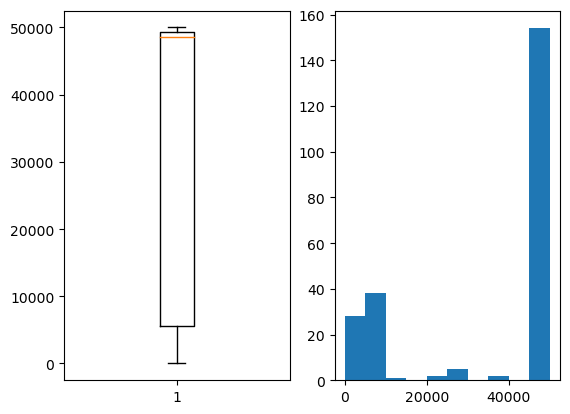

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(empty_entries_per_column)
ax2.hist(empty_entries_per_column)
median = empty_entries_per_column.median()
print(median)

In [88]:
num_entries = len(df)
threshold = 0.25
num_entries * threshold

12500.0

In [91]:
keep_vars = np.array(df.columns[(empty_entries_per_column <= (num_entries * threshold))])

In [92]:
num_vars = [elem for elem in num_vars if elem in keep_vars]
cat_vars = [elem for elem in cat_vars if elem in keep_vars]

In [94]:
for col in num_vars:
  col_mean = df[col].mean()
  df[col] = df[col].fillna(col_mean)

In [96]:
for col in cat_vars:
  df[col] = df[col].cat.add_categories('missing')
  df[col] = df[col].fillna('missing')

In [98]:
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.000000,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.000000,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.000000,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,1326.437116,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.000000,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [99]:
n_categories_per_feature = df[cat_vars].apply(lambda x: len(set(x)))

In [100]:
n_categories_per_feature

Var192      362
Var193       51
Var195       23
Var196        4
Var197      226
Var198     4291
Var199     5074
Var202     5714
Var203        6
Var204      100
Var205        4
Var206       22
Var207       14
Var208        3
Var210        6
Var211        2
Var212       81
Var216     2016
Var217    13991
Var218        3
Var219       23
Var220     4291
Var221        7
Var222     4291
Var223        5
Var226       23
Var227        7
Var228       30
dtype: int64

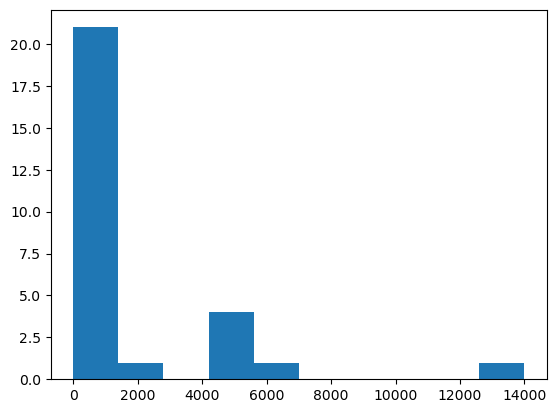

In [101]:
plt.hist(n_categories_per_feature)
cat_vars = np.array(n_categories_per_feature[n_categories_per_feature < 1400].index)

In [102]:
df = df[list(num_vars) + list(cat_vars)]

In [103]:
df.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var210,Var211,Var212,Var218,Var219,Var221,Var223,Var226,Var227,Var228
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,uKAI,L84s,XfqtO3UdzaXh_,cJvF,FzaX,oslk,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,uKAI,L84s,NhsEn4L,missing,FzaX,oslk,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,uKAI,L84s,UbxQ8lZ,UYBR,FzaX,Al6ZaUT,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,uKAI,Mtgm,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,uKAI,L84s,XfqtO3UdzaXh_,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


## 7. Modeling

In [105]:
df_c = pd.get_dummies(df)

In [106]:
df_c.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Var228_missing
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,0,0,0,0,0,0,0,0,0,0
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,0,0,0,0,1,0,0,0,0,0
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
np.array(target).ravel()

array([-1,  1, -1, ..., -1, -1, -1])

In [108]:
def etc_importances(features, outcome):
  model = ExtraTreesClassifier(n_estimators = 200, criterion = 'entropy', verbose = 0)
  model.fit(features, np.array(outcome).ravel())
  
  importances = model.feature_importances_
  variables = np.array(features.columns)
  indices = np.argsort(importances)[::-1]
  importances = importances[indices]
  variables = variables[indices]
  
  return variables, importances

In [109]:
variables, importances = etc_importances(df_c, target)

NameError: name 'outcome' is not defined